<h1>New York Taxi Trip Duration Analysis</h1>
by <b>Ninad Gadre</b>

<h3>Introduction</h3>
Yellow Medallion Taxicabs are iconic to New York City. There are currently over 13,000 licensed taxicabs and over 50,000 taxicab drivers providing transportation for passengers in all five boroughs via street hails. Medallion taxicab drivers must follow a set of TLC requirements in order to be licensed to drive a yellow taxicab. In this analysis, we try to address some of the long-standing problems in the transportation industry i.e. to predict the duration at the beginning of the trip. With the advent of technology based cab services, this problem has become particularly important for the drivers and the customers. A good prediction mechanism can be instrumental for drivers in optimizing their returns, while also saving the customers from the uncertainties attached to a trip. In our analysis, we attempt to examine and understand the provided feature and also attempt to find the best possible ways to leverage those features. The millions of rides taken each month can provide insight into traffic patterns, road blockage, or large-scale events that attract many New Yorkers. With ridesharing apps gaining popularity, it is increasingly important for taxi companies to provide visibility to ride duration, since the competing apps provide these metrics upfront. Predicting duration of a ride can help passengers decide when is the optimal time to start their commute, or help drivers decide which of two potential rides will be more profitable, for example. Furthermore, this visibility into fare will attract customers during times when ridesharing services are implementing surge pricing

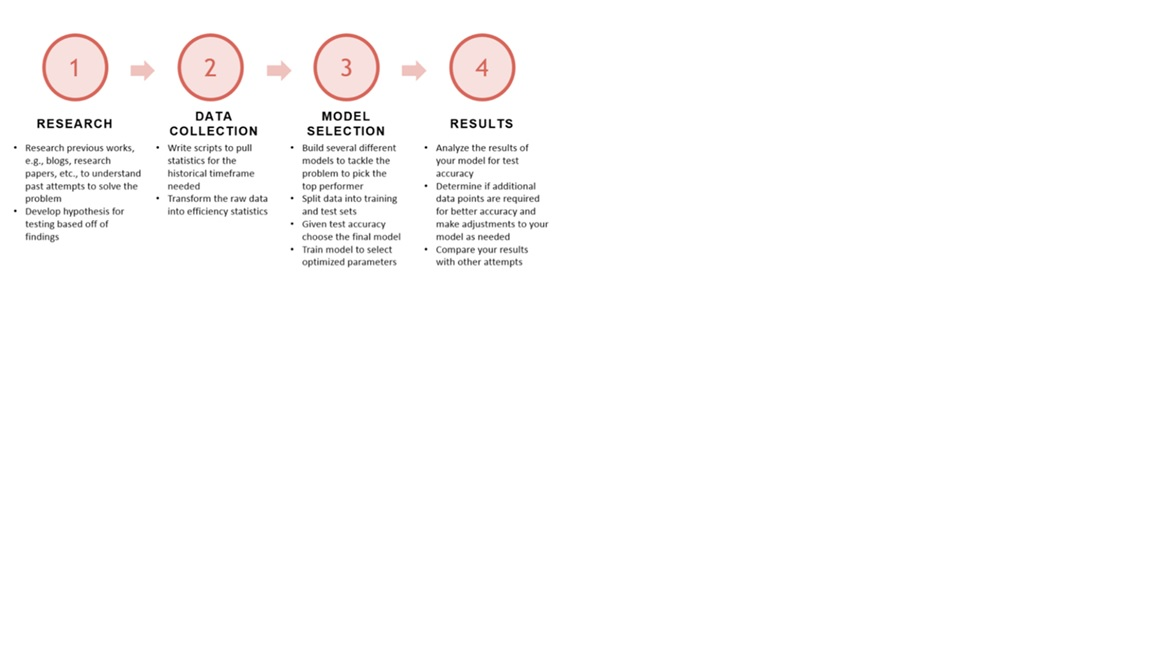

In [1]:
from IPython.display import Image
Image('/Users/ninad/Desktop/BDSIN/Final Project/Approach.jpg')

The data provides the details of yellow taxi rides in the New York City from Jan 2016 to June 2016. This data is provided by the NYC Taxi and Limousine Commission (downloaded from Kaggle). The data for each month is about 1.8GB and consists of roughly over 10 million trips. Each trip records fields: pick-up and drop-off dates/times, pick-up and drop-off coordinates, trip distances, passenger counts, id, vendor id and store_and_fwd_flag.

<h3><b>New York City Taxi Trip Duration Dataset</b></h3>
<h6><b>-id :</b> a unique identifier for each trip</h6>
<h6><b>-vendor_id :</b> a code indicating the provider associated with the trip record</h6>
<h6><b>-pickup_datetime :</b> date and time when the meter was engaged</h6>
<h6><b>-dropoff_datetime :</b> date and time when the meter was disengaged</h6>
<h6><b>-passenger_count :</b> the number of passengers in the vehicle (driver entered value)</h6>
<h6><b>-pickup_longitude :</b> the longitude where the meter was engaged</h6>
<h6><b>-pickup_latitude :</b> the latitude where the meter was engaged</h6>
<h6><b>-dropoff_longitude :</b> the longitude where the meter was disengaged</h6>
<h6><b>-dropoff_latitude :</b> the latitude where the meter was disengaged</h6>
<h6><b>-store_and_fwd_flag :</b> This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip</h6>
<h6><b>-trip_duration :</b> duration of the trip in seconds</h6>

<b>As will be doing exploratory analysis in this notebook we will import all the libraries required to visualize the data</b>

In [2]:
#First we will import all the required modules
import pandas as pd
import numpy as np
import seaborn as sns

<b>Load train Data, we have used parse_dates function while loading the data as the train dataset has columns which can be date and time nut are in string format</b>

In [3]:
import os
path = os.getcwd()
print(path)
df_train = pd.read_csv(path+'/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

C:\Users\ninad\Desktop\BDSIN\Final Project\Scripts


<b>Split the datetime columns into different columns having different information like date, day of the week, month, year etc</b>

In [4]:
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_minute'] = df_train['pickup_datetime'].dt.minute
df_train['pickup_second'] = df_train['pickup_datetime'].dt.second
df_train['pickup_day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['pickup_daymonth'] = df_train['pickup_datetime'].dt.day
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['pickup_year'] = df_train['pickup_datetime'].dt.year
df_train['pickup_date'] = df_train['pickup_datetime'].dt.date

In [5]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_daymonth,pickup_month,pickup_year,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,24,55,0,14,3,2016,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,43,35,6,12,6,2016,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,35,24,1,19,1,2016,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,32,31,2,6,4,2016,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,30,55,5,26,3,2016,2016-03-26


<b>Load the test dataset with the same technique used for loading the train dataset</b>

In [6]:
df_test = pd.read_csv(path+'/test.csv', parse_dates=['pickup_datetime'])
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:00,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:00,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:00,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:00,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:00,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)

In [8]:
df_test['pickup_date'] = df_test['pickup_datetime'].dt.date

<b>We will use .describe() on the train dataset which will generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</b>

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06
pickup_hour,1458644.0,13.606484,6.399693,0.000000,9.000000,14.000000,19.000000,2.300000e+01
pickup_minute,1458644.0,29.590158,17.324714,0.000000,15.000000,30.000000,45.000000,5.900000e+01
pickup_second,1458644.0,29.473591,17.319852,0.000000,14.000000,29.000000,44.000000,5.900000e+01


<b>The output of .shape is a tuple that gives the number of rows or the number of records and the number of columns of the dataframe</b>

In [10]:
print(df_train.shape)

(1458644, 19)


<b>The .info() will display the information of all the columns in the dataframe with their NaN's and datatype</b>

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_hour           1458644 non-null int64
pickup_minute         1458644 non-null int64
pickup_second         1458644 non-null int64
pickup_day            1458644 non-null int64
pickup_daymonth       1458644 non-null int64
pickup_month          1458644 non-null int64
pickup_year           1458644 non-null int64
pickup_date           1458644 non-null object
dty

<h6><b>Sanity check if there are any duplicate id's or duplicate records in the dataframe</b></h6>

In [12]:
print(df_train.id.duplicated().sum())

0


In [13]:
print(df_train.duplicated().sum())

0


<h6>Sanity check to cross check if all the trips are valid</h6>

In [14]:
sum(df_train.dropoff_datetime < df_train.pickup_datetime)

0

<h6>Getting to know about the data</h6>

In [15]:
#We will try and analyze the target variable that is trip duration
print("Longest Trip Duration in secs: {}".format(np.max(df_train['trip_duration'].values)))
print("Shortest Trip Duration in secs: {}".format(np.min(df_train['trip_duration'].values)))
print("Average Trip Duration in secs: {}".format(np.mean(df_train['trip_duration'].values)))

Longest Trip Duration in secs: 3526282
Shortest Trip Duration in secs: 1
Average Trip Duration in secs: 959.4922729603659


<h3>Outliers</h3>
An outlier is an observation point that is distant from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses. An outlier is an observation that appears to deviate markedly from other observations in the sample An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible). In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we should not  simply delete the outlying observation before a through investigation. In  running experimdnts , we may repeat the experiment. If the data contains significant outliers, we may need to consider the use of robust statistical techniques

<b>As we can observe that the smallest trip duration was of 1 seconds which is highly impossible and hence we will try and plot the outliers</b>

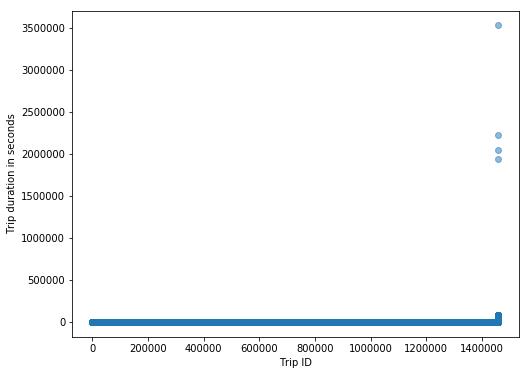

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(df_train['trip_duration'])), np.sort(df_train['trip_duration']), alpha=0.5)
plt.xlabel('Trip ID')
plt.ylabel('Trip duration in seconds')
plt.show()

From the above scatter plot we can see that there are 4 outliers in the target variable. As the count of outliers is small we will not eliminate them

In [17]:
# Getting to know about passengers column
print("Maximum number of passengers on a trip : ", np.max(df_train['passenger_count'].values))
print("Minimum number of passengers on a trip : ", np.min(df_train['passenger_count'].values))
print("Average number of passengers on a trip : ", np.mean(df_train['passenger_count'].values))
passenger_num = df_train['passenger_count'].value_counts()
print(passenger_num)

Maximum number of passengers on a trip :  9
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.6645295219395548
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


As from the above statistics, we can observe the number of rides decreses as the count of passengers goes on increasing

In [18]:
df_train[df_train['passenger_count'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_daymonth,pickup_month,pickup_year,pickup_date
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901,16,39,9,0,6,6,2016,2016-06-06
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4,5,1,32,4,1,1,2016,2016-01-01
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155,1,33,52,6,21,2,2016,2016-02-21
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251,12,24,17,0,4,1,2016,2016-01-04
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8,23,37,37,0,23,5,2016,2016-05-23
278290,id0796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9,17,23,48,6,7,2,2016,2016-02-07
301600,id2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072,23,52,46,4,1,1,2016,2016-01-01
303133,id0414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15,18,52,20,1,5,1,2016,2016-01-05
337809,id0271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41,0,23,15,6,22,5,2016,2016-05-22
375972,id3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15,5,10,23,1,31,5,2016,2016-05-31


As from the cell previous to this we saw that there were rides having 0 passenger count, to investigate further I selected only the records with zero passenger count records. We can observe that all the columns with respect to those records look fine and hence we will keep them  

<h6>Checking for null values in dataset</h6>

In [19]:
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_minute         0
pickup_second         0
pickup_day            0
pickup_daymonth       0
pickup_month          0
pickup_year           0
pickup_date           0
dtype: int64

<b>We see that training data contains 14 columns and ~1.4 Million data records with No nulls are present in out dataset.</b>

In [20]:
#Count based on the day of the week
print(df_train['pickup_day'].value_counts())

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: pickup_day, dtype: int64


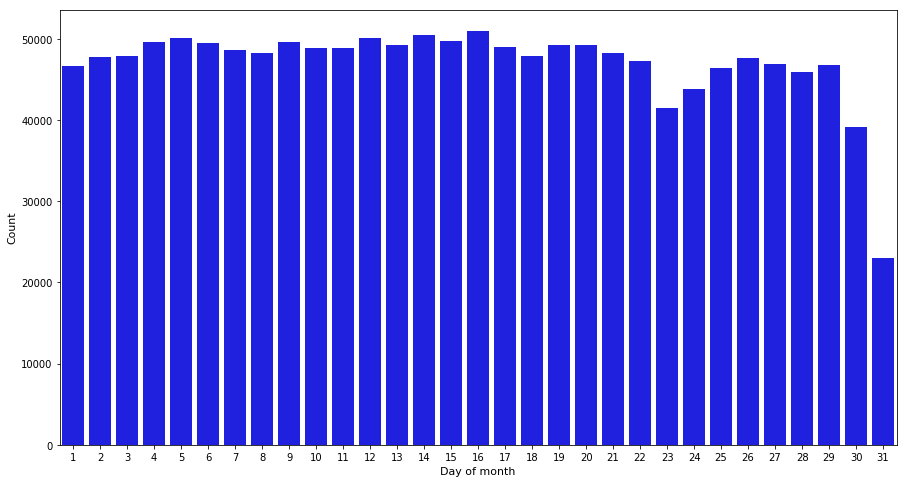

In [21]:
#Checking at what date of a month the number of trips are more
f = plt.figure(figsize=(15,8))
sns.countplot(x='pickup_daymonth', data=df_train, color = 'blue')
plt.xlabel('Day of month', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.show()

<b>In the above figure I have plotted number of taxi trips during a certain day of the month. As we can see from above figure, the number of trips stays uniform throughout the month except for the last few days of the month.</b>

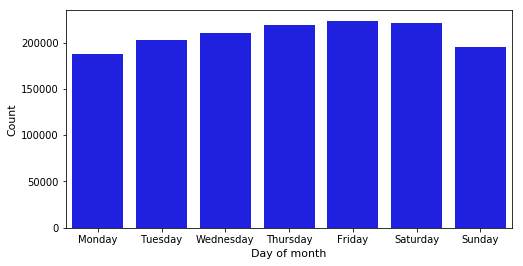

In [22]:
#Checking at what date of the week the number of trips are more
f = plt.figure(figsize=(8,4))
day_of_week = [i for i in range(7)]
sns.countplot(x='pickup_day', data=df_train, color = 'blue')
plt.xlabel('Day of month', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(day_of_week, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

<b>In the above figure I have plotted number of taxi trips during a certain day of the week. As we can see from above figure, the number of trips usually spikes, especially during the weekend i.e. Friday and Saturday, while it stays low on Monday.</b>

In [23]:
print(df_train['pickup_month'].value_counts())

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64


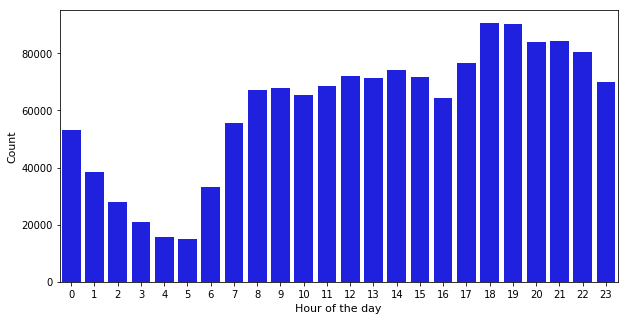

In [24]:
f = plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df_train, color = 'blue')
plt.xlabel('Hour of the day', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.show()

<b>In the above figure I have plotted number of taxi trips during a certain hour of the day. As we can observe from the above figure that the number of trips usually rises after 6pm till midnight</b>

It is evident from the above plot that number of trips spike after 6pm till midnight

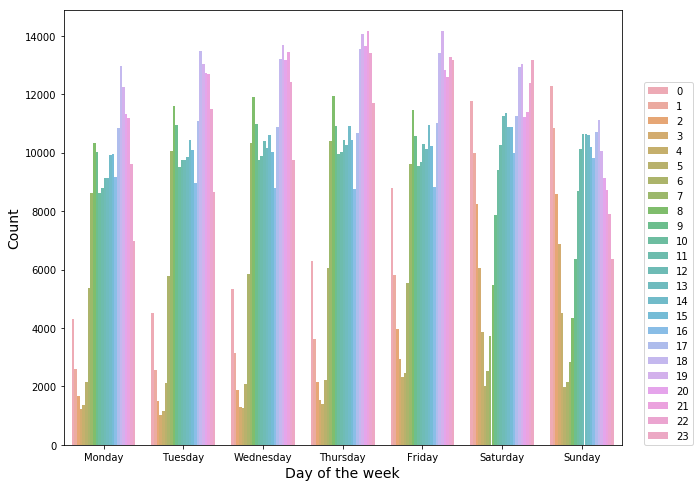

In [25]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_day', data=df_train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

<b>In the above figure I have tried to combine all the results I got above into one single plot. On the Y-axis we have the count of trips and on the X-axis, we have day of the week combined with the hour of the day. As we can observe, count of trips is more on weekend with the count spikes in peak hours from 6pm till midnight.</b>

<h3>Reading the external data</h3>

In [26]:
#df_train_new = df_train.copy()
fast_route_1 = pd.read_csv(path+'/fastest_routes_train_part_1.csv')

fast_route_2 = pd.read_csv(path+'/fastest_routes_train_part_2.csv')

fast_route = pd.concat([fast_route_1,fast_route_2])
fast_route.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


We will check if the OSRM data is clean or not. First step is we will check for duplicate id's ad records

In [27]:
print(fast_route.id.duplicated().sum())

0


From the OSRM data we will only keep id,total_distance,total_travel_time and number_of_steps columns.

In [28]:
fast_route_new = fast_route[['id','total_distance','total_travel_time','number_of_steps']]
fast_route_new.head()

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.1,164.9,5
1,id2377394,2513.2,332.0,6
2,id3504673,1779.4,235.8,4
3,id2181028,1614.9,140.1,5
4,id0801584,1393.5,189.4,5


We will join the the fastest route data with the original dataframe

In [29]:
df_train_new = df_train.copy()
train_df = pd.merge(df_train_new, fast_route_new, on='id', how='left')
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,pickup_second,pickup_day,pickup_daymonth,pickup_month,pickup_year,pickup_date,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,55,0,14,3,2016,2016-03-14,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,35,6,12,6,2016,2016-06-12,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,24,1,19,1,2016,2016-01-19,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,31,2,6,4,2016,2016-04-06,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,55,5,26,3,2016,2016-03-26,1614.9,140.1,5.0


In [30]:
print(train_df.shape)

(1458644, 22)


In [31]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_minute         0
pickup_second         0
pickup_day            0
pickup_daymonth       0
pickup_month          0
pickup_year           0
pickup_date           0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

<h3>Visualize the trip duration given using log-scale distplot in sns</h3>
We want to predict trip_duration of the test set, so we first check what kind of trips durations are present in the dataset. First, I plotted it on a plain scale and not on a log scale, and some of the records have very long trip durations ~100 hours. Such long trips are making all another trip invisible in the histogram on plain scale => We go ahead with the log scale. Another reason of using the log scale for visualizing trip-duration on the log scale is that this competition uses RMSLE matrix so it would make sense to visualize the target variable in log scale only.

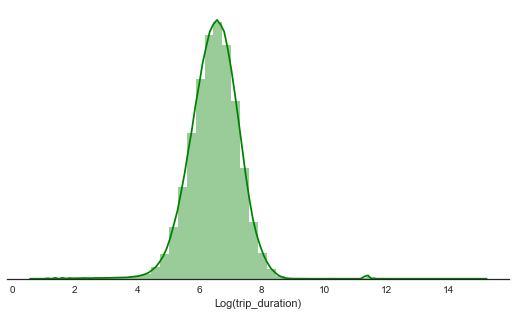

In [32]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")
f, axes = plt.subplots(1, 1, figsize=(9, 5), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['trip_duration'].values+1), 
             axlabel = 'Log(trip_duration)', 
             label = 'log(trip_duration)', 
             bins = 50, 
             color="g")
plt.setp(axes, yticks=[])
plt.show()


<b>Note</b>
It is clear with the above histogram and kernel density plot that the trip-durations are like Gaussian and few trips have very large duration.

In [33]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_daymonth,pickup_month,pickup_year,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,24,55,0,14,3,2016,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,43,35,6,12,6,2016,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,35,24,1,19,1,2016,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,32,31,2,6,4,2016,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,30,55,5,26,3,2016,2016-03-26


<b>Note</b>
From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 ton-73. We are not getting any histogram kind of plots when we are plotting lat-long as the distplot function of sns is getting affected by outliers, trips which are very far from each other like lat 32 to lat 44, are taking very long time, and have affected this plot such that it is coming off as a spike. Let's remove those large duration trip by using a cap on lat-long and visualize the distributions of latitude and longitude given to us

Text(0.5,1,'Dropoff')

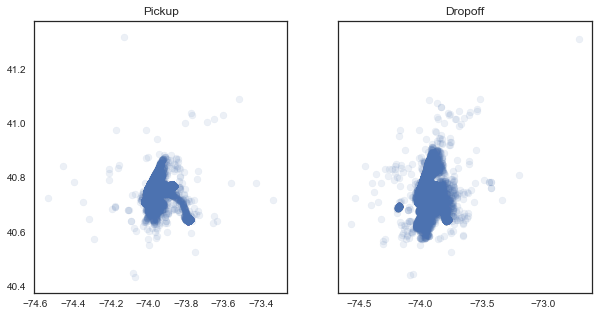

In [34]:
n=100000
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.scatter(df_train.pickup_longitude[:n], df_train.pickup_latitude[:n], alpha = 0.1)
ax1.set_title('Pickup')

ax2.scatter(df_train.dropoff_longitude[:n], df_train.dropoff_latitude[:n], alpha = 0.1)
ax2.set_title('Dropoff')

<b> While most of the trips are e^4 = 1 minute to e^8 ~ 60 minutes. and probably are taken inside Manhattan or in new york only. Let's check the lat-long distributions are then used them to have a heat map kind of view of given lat-longs.</b>

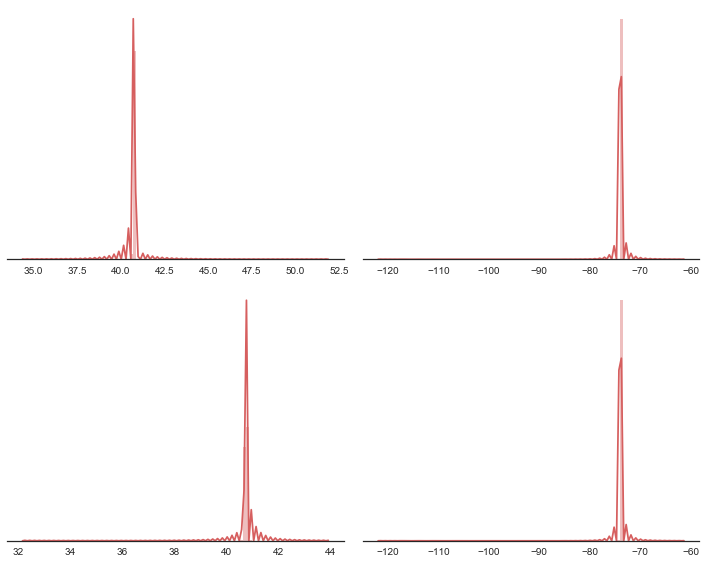

In [35]:
#***************************************************************************************
#*    This was adapted from a post from
#*    Author: Louis Po-Wei Chen
#*    Date: 04/23/2018
#*    Availability: https://github.com/louispoweichen/New_York_City_Taxi_Trip_Duration
#*
#***************************************************************************************/

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 8), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_train['pickup_latitude'].values, label = 'pickup_latitude',color="r",bins = 100, ax=axes[0,0])
sns.distplot(df_train['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_train['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(df_train['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

<b>Note</b>
From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 ton-73. We are not getting any histogram kind of plots when we are plotting lat-long as the distplot function of sns is getting affected by outliers, trips which are very far from each other like lat 32 to lat 44, are taking very long time, and have affected this plot such that it is coming off as a spike. Let's remove those large duration trip by using a cap on lat-long and visualize the distributions of latitude and longitude given to us.

1452385 1452385


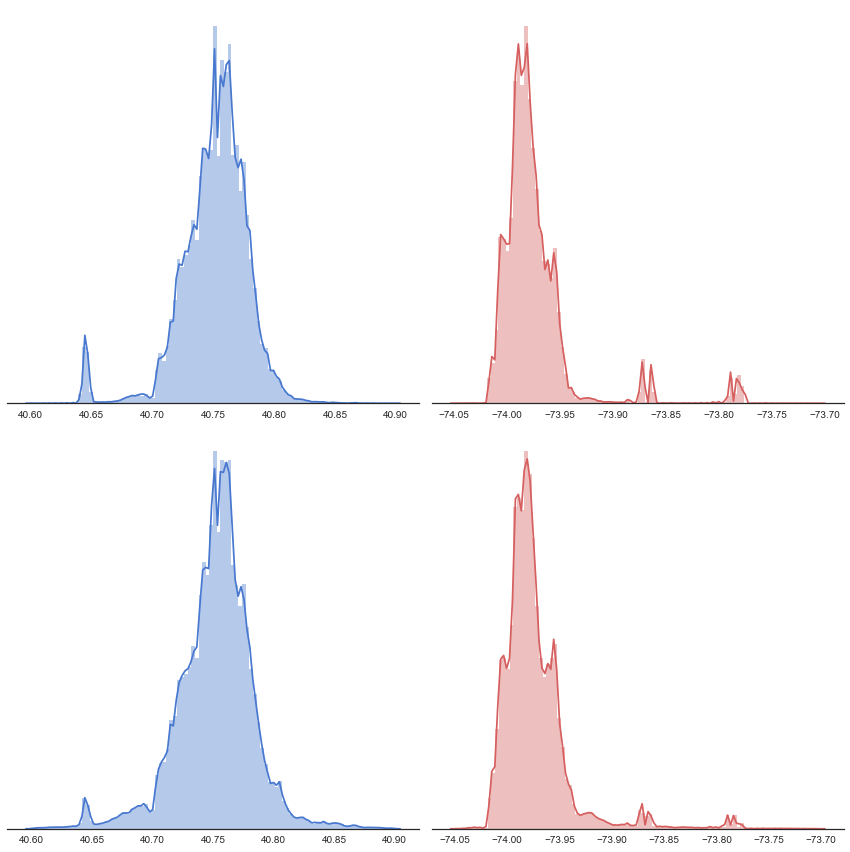

In [36]:
#***************************************************************************************
#*    This was adapted from a post from
#*    Author: Louis Po-Wei Chen
#*    Date: 04/23/2018
#*    Availability: https://github.com/louispoweichen/New_York_City_Taxi_Trip_Duration
#*
#***************************************************************************************/

df = df_train.loc[(df_train.pickup_latitude > 40.6) & (df_train.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
print(df.shape[0], df_new.shape[0])
plt.show()

We put the following caps on lat-long -

-latitude should be between 40.6 to 40.9

-longitude should be between -74.05 to -73.70

We get that the distribution spikes becomes as distribution in distplot (distplot is a histogram plot in seaborn package), we can see that most of the trips are getting concentrated between these lat-long only. Let's plot them on an empty image.

<h3>Heatmap of coordinates</h3>

We have taken an empty image and make it a color it black so that we can see colors where the lat-longs are falling. To visualize we need to consider each point of this image as a point represented by lat-long, to achieve that we will bring the lat-long to image coordinate range and then take a summary of lat-long and their count, assign a different color for different count range.

<h6>Why 255?</h6>
RGB (Red, Green, Blue) are 8 bit each.
The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256.
It really comes down to math and getting a value between 0-1. Since 255 is the maximum value, dividing by 255 expresses a 0-1 representation. Each channel (Red, Green, and Blue are each channels) is 8 bits, so they are each limited to 256, in this case 255 since 0 is included

00000000 - 00000000 - 00000000 would be the RGB value of black; none of any colour.

11111111 - 11111111 - 11111111 would be white; all of everything.

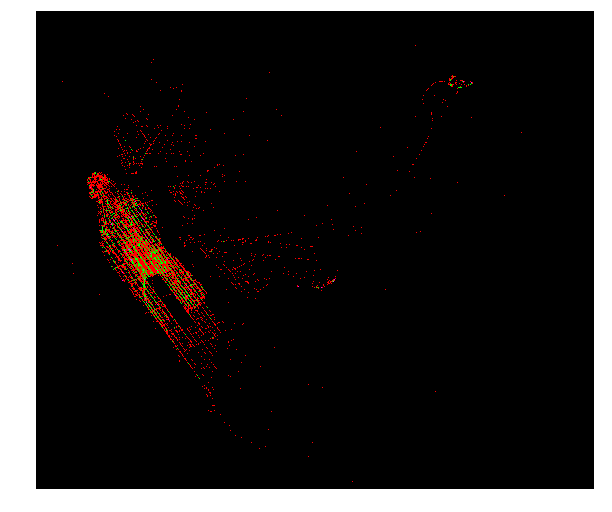

In [37]:
#***************************************************************************************
#*    This was adapted from a post from
#*    Author: Louis Po-Wei Chen
#*    Date: 04/23/2018
#*    Availability: https://github.com/louispoweichen/New_York_City_Taxi_Trip_Duration
#*
#***************************************************************************************/

rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
df_new['pick_lat_new'] = list(map(int, (df_new['pickup_latitude'] - (40.6000))*10000))
df_new['drop_lat_new'] = list(map(int, (df_new['dropoff_latitude'] - (40.6000))*10000))
df_new['pick_lon_new'] = list(map(int, (df_new['pickup_longitude'] - (-74.050))*10000))
df_new['drop_lon_new'] = list(map(int,(df_new['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(df_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off()

To get an idea about the actual pickup and dropoff locations, we will take only the location co-ordinates of pickup and dropoff from the original dataframe into another dataframe

In [38]:
location_df = df_new[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

To get the exact co-ordinates and for the sake of plot to look neat we will round off the co-ordinates to 2 decimals

In [39]:
np.round(location_df, decimals=2).head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.98,40.77,-73.96,40.77
1,-73.98,40.74,-74.00,40.73
2,-73.98,40.76,-74.01,40.71
3,-74.01,40.72,-74.01,40.71
4,-73.97,40.79,-73.97,40.78


<h3>Scatter Plot</h3>

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are color-coded, one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. A scatter plot can be used either when one continuous variable that is under the control of the experimenter and the other depends on it or when both continuous variables are independent.

We will use scatter plot to plot the co-ordinates, to get an clear idea about the pickup and dropoff

Text(0.5,1,'Dropoffs')

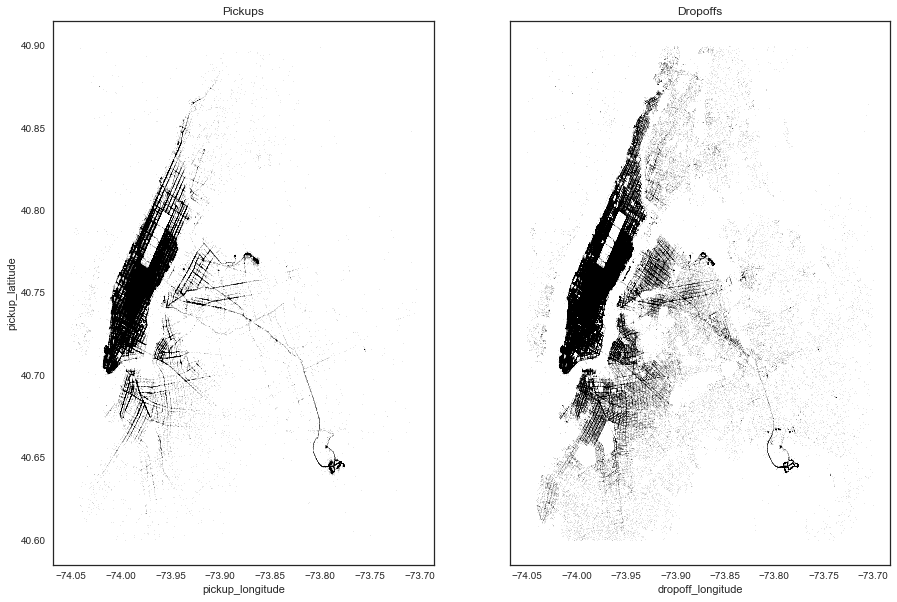

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

location_df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
#ax1.set_facecolor('black')

location_df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
#ax2.set_facecolor('black')

<h3>Validation Strategy</h3>

First let's check the train test split.
It helps to decide our validation strategy and gives ideas about feature engineering.

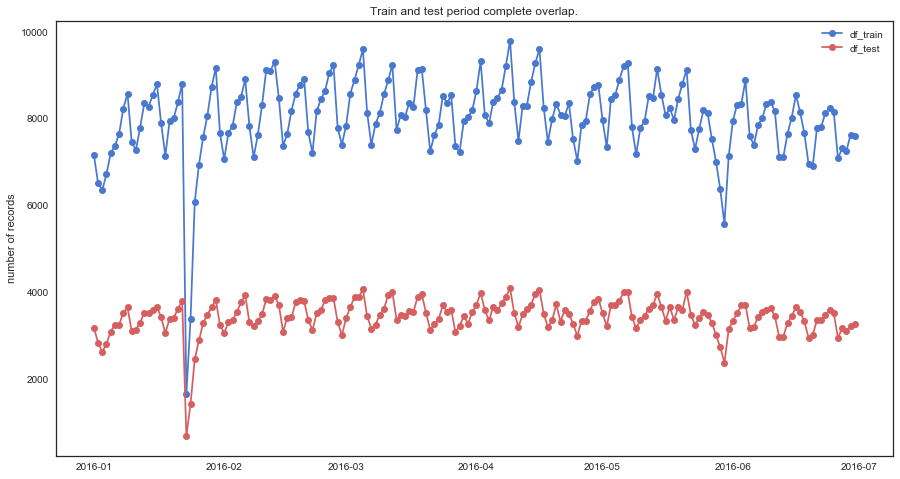

In [41]:
f = plt.figure(figsize=(15,8))
plt.plot(df_train.groupby('pickup_date').count()[['id']], 'o-', label='df_train')
plt.plot(df_test.groupby('pickup_date').count()[['id']], 'o-', label='df_test', color='r')
plt.title('Train and test period complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

<b>In this case the train and test split seems to be random.
This allows us to use unsupervised learning and feature extraction to be applied on the full data set.</b>

<h3>Principal Component Analysis</h3>

Sometimes data are collected on a large number of variables from a single population. With a large number of variables, the dispersion matrix may be too large to study and interpret properly. There would be too many pairwise correlations between the variables to consider. Graphical displays may also not be particularly helpful when the data set is very large. With 12 variables, for example, there will be more than 200 three-dimensional scatterplots. To interpret the data in a more meaningful form, it is necessary to reduce the number of variables to a few, interpretable linear combinations of the data. Each linear combination will correspond to a principal component.<b>We use PCA to transform longitude and latitude coordinates.
In this case it is not about dimension reduction since we transform 2D-> 2D. The rotation could help for decision tree splits.</b>

In [42]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

In [43]:
# np.vstack takes all the values and vertically stack them to make one giant vector
coords = np.vstack((df_train[['pickup_latitude', 'pickup_longitude']].values,
                    df_train[['dropoff_latitude', 'dropoff_longitude']].values,
                    df_test[['pickup_latitude', 'pickup_longitude']].values,
                    df_test[['dropoff_latitude', 'dropoff_longitude']].values))
pca = PCA().fit(coords)

<h3>Clustering</h3>
<h4>K-means Clustering</h4>

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents. 

In [44]:
samples = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[samples])

In [45]:
df_train.loc[:, 'pickup_cluster'] = kmeans.predict(df_train[['pickup_latitude', 'pickup_longitude']])
df_train.loc[:, 'dropoff_cluster'] = kmeans.predict(df_train[['dropoff_latitude', 'dropoff_longitude']])
df_test.loc[:, 'pickup_cluster'] = kmeans.predict(df_test[['pickup_latitude', 'pickup_longitude']])
df_test.loc[:, 'dropoff_cluster'] = kmeans.predict(df_test[['dropoff_latitude', 'dropoff_longitude']])

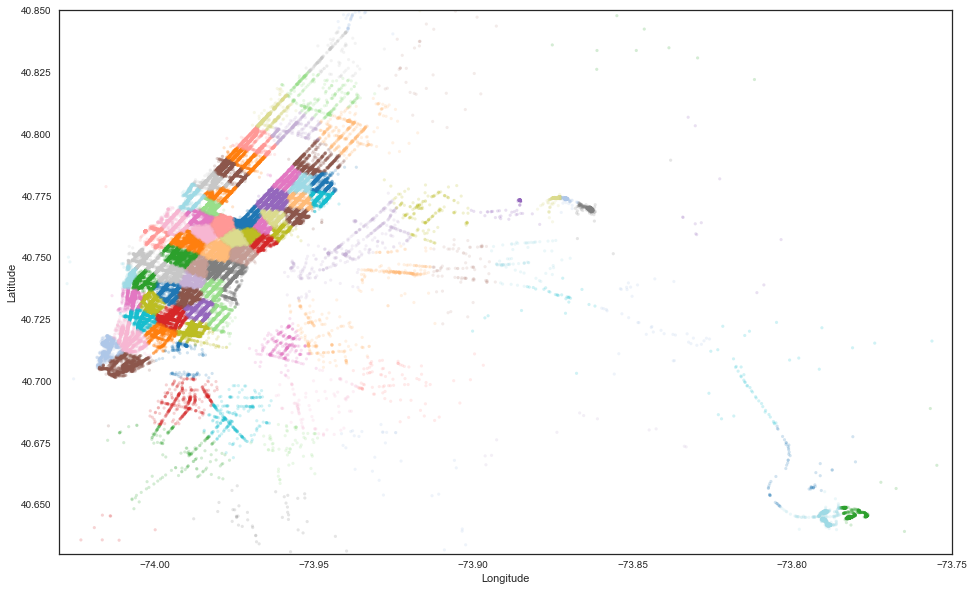

In [46]:
#***************************************************************************************
#*    This was adapted from a post from
#*    Author: Louis Po-Wei Chen
#*    Date: 04/23/2018
#*    Availability: https://github.com/louispoweichen/New_York_City_Taxi_Trip_Duration
#*
#***************************************************************************************/

N = 100000 # number of sample rows in plots
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,10))
ax.scatter(df_train.pickup_longitude.values[:N], df_train.pickup_latitude.values[:N], s=10, lw=0,
           c=df_train.pickup_cluster[:N].values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

<h1>License (MIT)</h1>

Copyright (c) 2018 by Ninad Gadre

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.